<a href="https://colab.research.google.com/github/Nascent-bot/ML-Projects/blob/master/CoeProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Setting Warnings
import warnings
warnings.filterwarnings('ignore')

#Read the csv file
df=pd.read_csv('tata_beverages.csv',index_col='Date',parse_dates=True)

# ABOUT THE DATASET
We’ll be using a dataset from Quandl (you can find historical data for various stocks here) and for this particular project, 
I have used the data for  ‘Tata Global Beverages’.


**FEATURES:**

There are multiple variables in the dataset – date, open, high, low, last, close, total_trade_quantity, and turnover.

1.The columns **Open** and **Close** represent the starting and final price at which the stock is traded on a particular day.

2.**High**, **Low** and **Last** represent the maximum, minimum, and last price of the share for the day.

3.**Volume** is the number of shares bought or sold in the day and **Turnover (Lacs)** is the turnover 
of the particular company on a given date.

In [87]:
#Let's Print the Head
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2416 entries, 2010-06-29 to 2020-02-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2416 non-null   float64
 1   High       2416 non-null   float64
 2   Low        2416 non-null   float64
 3   Close      2416 non-null   float64
 4   Adj Close  2416 non-null   float64
 5   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 132.1 KB


In [90]:
df.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-03'],
              dtype='datetime64[ns]', name='Date', length=2416, freq=None)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2416.0,1.862711e+02,1.187402e+02,16.139999,3.434250e+01,2.130350e+02,2.664500e+02,6.736900e+02
High,2416.0,1.895782e+02,1.208923e+02,16.629999,3.489750e+01,2.167450e+02,2.709275e+02,7.861400e+02
Low,2416.0,1.829166e+02,1.168576e+02,14.980000,3.358750e+01,2.088700e+02,2.621025e+02,6.735200e+02
Close,2416.0,1.864037e+02,1.191360e+02,15.800000,3.440000e+01,2.129600e+02,2.667750e+02,7.800000e+02
Adj Close,2416.0,1.864037e+02,1.191360e+02,15.800000,3.440000e+01,2.129600e+02,2.667750e+02,7.800000e+02
Volume,2416.0,5.572722e+06,4.987809e+06,118500.000000,1.899275e+06,4.578400e+06,7.361150e+06,4.706500e+07


In [6]:
df.resample('MS')

In [96]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


# Target variable
The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we will consider the closing price as the target variable. Let’s plot the target variable to understand how it’s shaping up in our data:

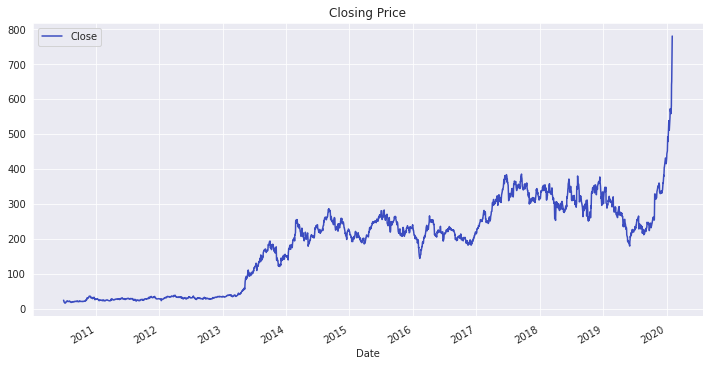

In [8]:
sns.set_style('darkgrid')
df['Close'].plot(figsize=(12,6),title='Closing Price',grid=True,colormap='coolwarm',legend=True);

It's Obvious that There is Some Sort of Exponential Trend in our Data.Later We will Verify that using Some Statistical Tests

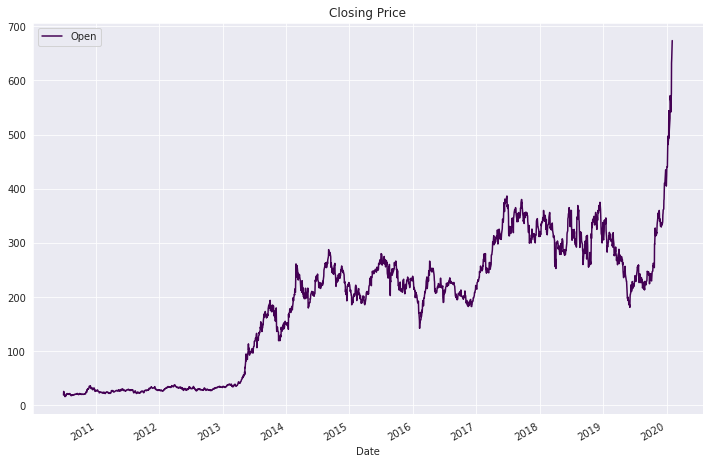

In [9]:
#Let''s Plot Out Opening Price of Our Data
sns.set_style('darkgrid')
#df['Close'].plot(figsize=(12,8),title='Closing Price',grid=True,colormap='coolwarm',legend=True);
df['Open'].plot(figsize=(12,8),title='Closing Price',grid=True,colormap='viridis',legend=True);

In [10]:
df.iloc[-1]

Open         6.736900e+02
High         7.861400e+02
Low          6.735200e+02
Close        7.800000e+02
Adj Close    7.800000e+02
Volume       4.706500e+07
Name: 2020-02-03 00:00:00, dtype: float64

It's Quite Clear that Tata Beverages Prices Started to Spike after 2014 and it had Serious High Prices in 2020 Which is Current Prices!!

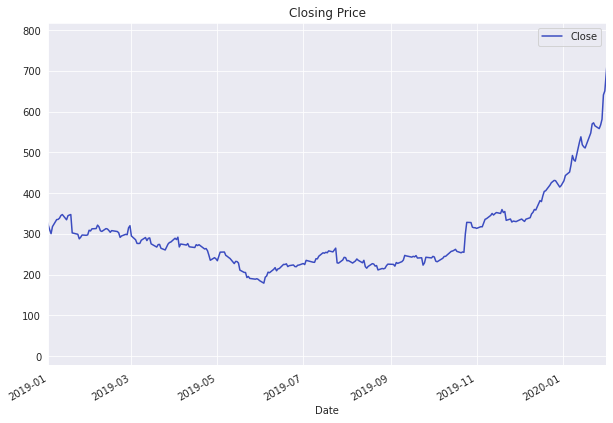

In [11]:
#let's Plot out the Closing Prices For Past One Year
sns.set_style('darkgrid')
df['Close'].plot(figsize=(10,7),title='Closing Price',grid=True,colormap='coolwarm',legend=True,
                 xlim=['2019-01-01','2020-02-01']);
#df['Open'].plot(figsize=(12,8),title='Closing Price',grid=True,colormap='coolwarm',legend=True,xlim=['2019-01-01','2019-12-31'])
                                                                                                      

There Was a Quite Small Down Trend During June Month of 2019 Later The Price Started Increasing Higher after Dec 2019

In [12]:
#Let's Plot out the Volume Per Year
yearly_vol=df.resample('Y').mean()
yearly_vol

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,23.408000,24.077231,22.646077,23.341846,23.341846,1.579762e+06
2011-12-31,26.821984,27.380238,26.194167,26.804762,26.804762,1.290615e+06
2012-12-31,31.203120,31.809160,30.545880,31.168600,31.168600,1.229796e+06
2013-12-31,104.416428,106.853016,101.779881,104.401230,104.401230,8.407722e+06
2014-12-31,223.415397,227.449881,219.206111,223.329088,223.329088,6.913973e+06
2015-12-31,229.831944,233.381666,226.270635,230.042898,230.042898,4.318325e+06
2016-12-31,210.058452,213.433492,206.286151,209.767262,209.767262,4.612546e+06
2017-12-31,314.296215,318.450598,309.686972,314.316295,314.316295,6.334786e+06
2018-12-31,317.183466,323.693626,310.552311,317.309921,317.309921,8.612107e+06


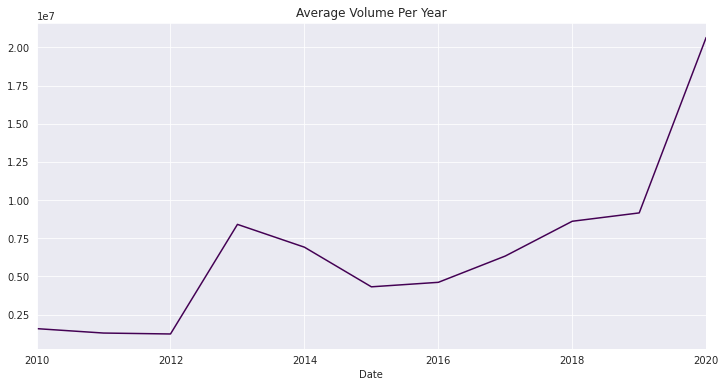

In [13]:
yearly_vol['Volume'].plot(title='Average Volume Per Year',grid=True,colormap='viridis',figsize=(12,6))

Hmm It's Quiet Clear that people Started Buying More Stocks Later 2019 Might be Because of many reasons!!

In [0]:
#Let's Check out Closing Prices in Quarters
from statsmodels.graphics.tsaplots import month_plot
moth=df.resample('M').mean()

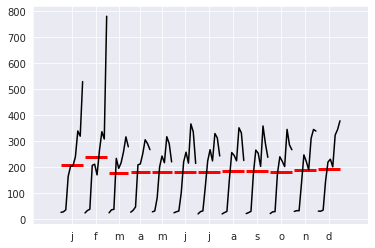

In [15]:
month_plot(moth['Close']);

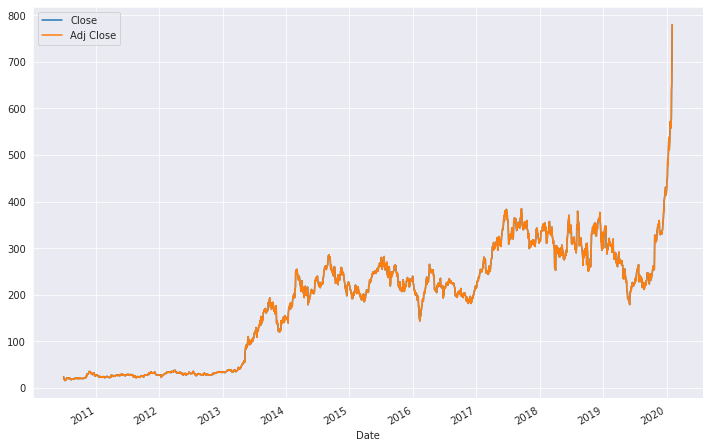

In [16]:
df[['Close','Adj Close']].plot(figsize=(12,8))

In [17]:
df[df['Close']==df['Adj Close']].shape

(2416, 6)

# Adjusted closing price factors in corporate actions such as stock splits, dividends / distributions and rights offerings.

But in our Data Set Close Price and Adj Close Price where just same so let's Drop this out!!

In [0]:
df=df.drop('Adj Close',axis=1)

In [19]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


In [0]:
yearly_mean=df.resample('Y').mean()

In [21]:
yearly_mean['Close']

Date
2010-12-31     23.341846
2011-12-31     26.804762
2012-12-31     31.168600
2013-12-31    104.401230
2014-12-31    223.329088
2015-12-31    230.042898
2016-12-31    209.767262
2017-12-31    314.316295
2018-12-31    317.309921
2019-12-31    273.530198
2020-12-31    540.083639
Freq: A-DEC, Name: Close, dtype: float64

In [22]:
#Closing Value Percent Increase from 2010 to 2020
((yearly_mean['Close'][-1]-yearly_mean['Close'][0])/yearly_mean['Close'][0])*100

2213.8000115342534

Bam there was a increase of 2.2k % from the average of Closing Price in 2010

In [0]:
#Now Let's Calculate Which Year had Highest Percentage Change than Previous Year
yearly_mean1=yearly_mean.shift(1)

In [24]:
abs(((yearly_mean['Close']-yearly_mean1['Close'])/yearly_mean['Close'])*100)

Date
2010-12-31          NaN
2011-12-31    12.919032
2012-12-31    14.000751
2013-12-31    70.145371
2014-12-31    53.252292
2015-12-31     2.918504
2016-12-31     9.665777
2017-12-31    33.262365
2018-12-31     0.943439
2019-12-31    16.005444
2020-12-31    49.354104
Freq: A-DEC, Name: Close, dtype: float64

There Was Highest Percentage Increase in Avg Closing Price in the Year 2014,Later 2020 is Having Highest percentage Change!!

# Train_Test Split

Unlike Regular Machine Learning Model We dont Perform Train_test_split here.

Because Our Data Completely Deals With Price over a Date so We will Do the Followinf Steps.

1.We Split Our Data into Train  and Test Data using index.

2.Say 7 years is taken as Training Data and Last 3 Years as testing

3.We Fit Our Model using Training Data 

4.We Compare Our Predictions With our Test Data and We Wil Check How Well our Model Forecasts Actually Known Data

5.Once Our Model Performs Well We Forecast the Future Predictions

6.Evaluation is Done Using RMSE,MSE,MAE

In [25]:
df.loc[:'2017-12-31'].shape

(1891, 5)

We Took **2010-2017** As Our Training Data 
and **2018-2020** As Our Testing Data


In [0]:
train=df[:1891]
test=df[1891:]

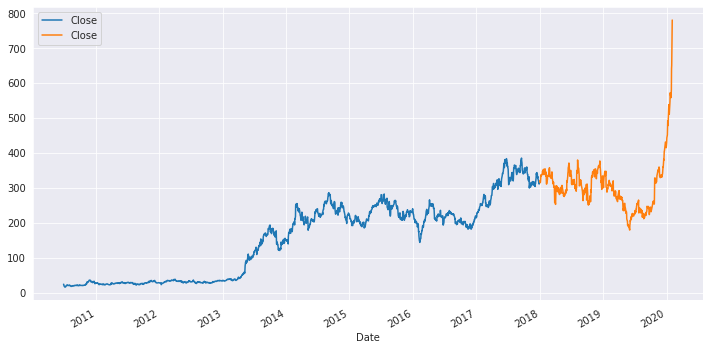

In [27]:
#Our Actual Data
train['Close'].plot(figsize=(12,6),legend=True)
test['Close'].plot(figsize=(12,6),legend=True)

In [0]:
def ad_test(series):
    #Reading Series Data adn Performing Augumented Dicky Fuller Test
    res=adfuller(series)
    
    #Converting the Test Result to DataFrame
    test_Series=pd.Series(res[:4],index=['Statistic_test','P-Value','No_of_lags','#of_observation'])
    
    print(test_Series)
    
    
    #Checking p value and if p is <0.05 we reject our Null Hypothesis and if p >0.05 we Fail to Reject Hypothesis
    if(test_Series[1]<0.05):
        print("Given Data is Satationary")
        print("We Strongly Reject the Null Hypothesis")
    
    else:
        print("Given Data is Non-Satationary")
        print("We Fail to Reject the Null Hypothesis")
    

In [29]:
from statsmodels.tsa.stattools import adfuller
ad_test(df['Close'])

Statistic_test        1.400069
P-Value               0.997114
No_of_lags           18.000000
#of_observation    2397.000000
dtype: float64
Given Data is Non-Satationary
We Fail to Reject the Null Hypothesis


# Auto ARIMA Model

ARIMA is a very popular statistical method for time series forecasting. 

ARIMA models take into account the past values to predict the future values. There are three important parameters in ARIMA:

p (past values used for forecasting the next value)

q (past forecast errors used to predict the future values)

d (order of differencing)

Parameter tuning for ARIMA consumes a lot of time. So we will use auto ARIMA which automatically selects the best combination of (p,q,d) that provides the least error. 

In [30]:
!pip install pmdarima

In [0]:
from pmdarima import auto_arima

In [59]:
auto_arima(train['Close'],trace=True,seasonal=False,error_action='ignore',suppress_warnings=True).summary()

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=11299.996, BIC=11333.262, Time=4.480 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=11305.395, BIC=11316.484, Time=0.073 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=11304.683, BIC=11321.316, Time=0.140 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=11304.743, BIC=11321.376, Time=0.282 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=11305.284, BIC=11310.828, Time=0.049 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=11306.796, BIC=11334.517, Time=1.489 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=11306.817, BIC=11334.539, Time=1.683 seconds
Fit ARIMA(3,1,2)x(0,0,0,0) [intercept=True]; AIC=11309.240, BIC=11348.050, Time=1.636 seconds
Fit ARIMA(2,1,3)x(0,0,0,0) [intercept=True]; AIC=11309.215, BIC=11348.025, Time=2.734 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=11306.631, BIC=11328.808, Time=0.550 seconds
Fit ARIMA(1,1,3)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1891
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -5643.998
Date:                Sun, 14 Jun 2020   AIC                          11299.996
Time:                        13:51:57   BIC                          11333.262
Sample:                             0   HQIC                         11312.245
                               - 1891                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1407      0.110      1.282      0.200      -0.074       0.356
ar.L1          0.9925      0.014     72.976      0.000       0.966       1.019
ar.L2         -0.9813      0.014    -69.430      0.000      -1.009      -0.954
ma.L1         -0.9799      0.018    -53.953      0.000      -1.016      -0.944
ma.L2          0.9671      0.018     52.387      0.000       0.931       1.003
sigma2        22.9405      0.391     58.723      0.000      22.175      23.706
===================================================================================
Ljung-Box (Q):                       36.07   Jarque-Bera (JB):              2343.08
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):              39.57   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults


In [34]:
model = ARIMA(train['Close'],order=(2,1,2))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 1890
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5647.441
Method:                       css-mle   S.D. of innovations              4.802
Date:                Sun, 14 Jun 2020   AIC                          11306.882
Time:                        13:50:25   BIC                          11340.148
Sample:                             1   HQIC                         11319.132
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1520      0.114      1.334      0.182      -0.071       0.375
ar.L1.D.Close    -0.5734      0.222     -2.585      0.010      -1.008      -0.139
ar.L2.D.Close    -0.6855      0.221     -3.100      0.002      -1.119      -0.252
ma.L1.D.Close     0.6077      0.215      2.832      0.005       0.187       1.028
ma.L2.D.Close     0.7211      0.205      3.511      0.000       0.319       1.124
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4182           -1.1331j            1.2078           -0.3063
AR.2           -0.4182           +1.1331j            1.2078            0.3063
MA.1           -0.4213           -1.0996j            1.1776           -0.3082
MA.2           -0.4213           +1.0996j            1.1776            0.3082
-----------------------------------------------------------------------------
"""

In [0]:
start=len(train)
end=len(train)+len(test)-1

In [0]:
pred=results.predict(start=start,end=end,typ='levels').rename("ARIMA Prediction")

In [37]:
pred_df=pd.DataFrame(pred)
pred_df.index=test.index
pred_df.head()

,ARIMA Prediction
Date,
2018-01-02,311.278119
2018-01-03,311.348617
2018-01-04,311.700749
2018-01-05,311.793797
2018-01-08,311.842352


In [38]:
pred_df.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-03'],
              dtype='datetime64[ns]', name='Date', length=525, freq=None)

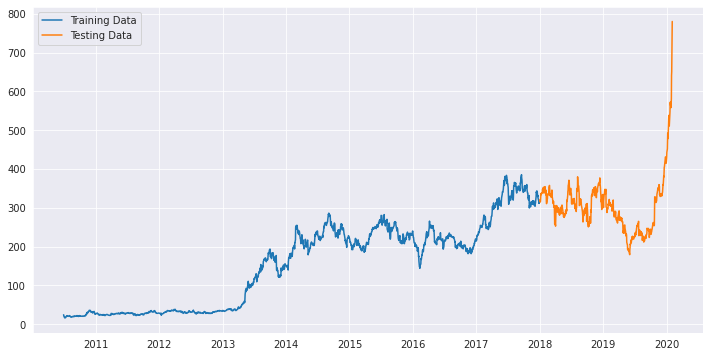

In [39]:
plt.figure(figsize=(12,6))
plt.plot(train['Close'],label="Training Data")
plt.plot(test['Close'],label="Testing Data")
plt.legend()

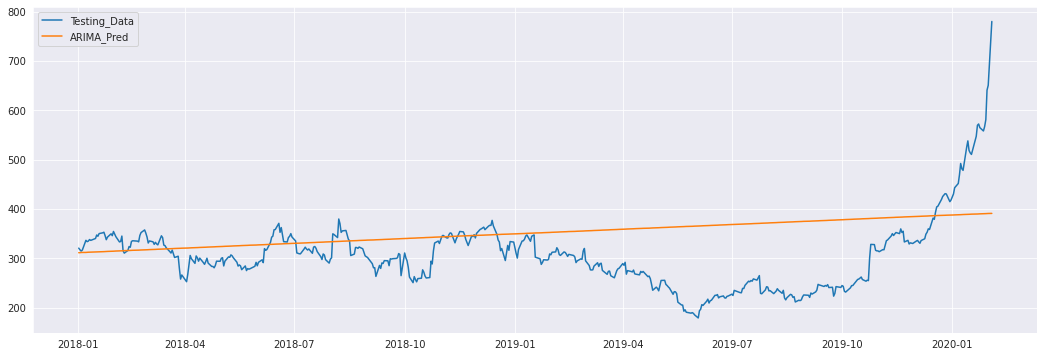

In [40]:
plt.figure(figsize=(18,6))
plt.plot(test['Close'],label="Testing_Data")
plt.plot(pred_df['ARIMA Prediction'],label='ARIMA_Pred')
plt.legend()

Great!! Our Model performed Quite Well and Captured Trend Well,but it Failed to Capture Seasonality let's Train Our Model With Seasonal Arima!!

**Model Evaluation**

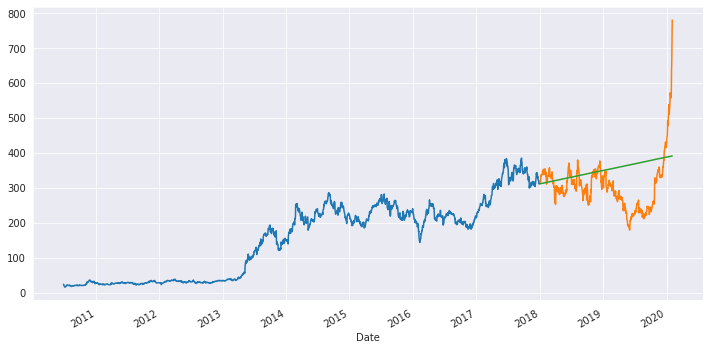

In [41]:
train['Close'].plot(figsize=(12,6))
test['Close'].plot(figsize=(12,6))
pred_df['ARIMA Prediction'].plot(figsize=(12,6))

In [0]:
from sklearn.metrics import mean_squared_error

In [43]:
np.sqrt(mean_squared_error(test['Close'],pred_df['ARIMA Prediction']))

85.80355690793094

In [44]:
test['Close'].mean()

305.6309335485711

We are off by 85 from its original mean!!Let's try out with SARIMA Model!!

In [45]:
mape = np.mean(np.abs(pred_df['ARIMA Prediction'] - test['Close'])/np.abs(test['Close']))
print('MAPE: '+str(mape))

MAPE: 0.24599432759029002


In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults
from statsmodels.tsa.seasonal import seasonal_decompose

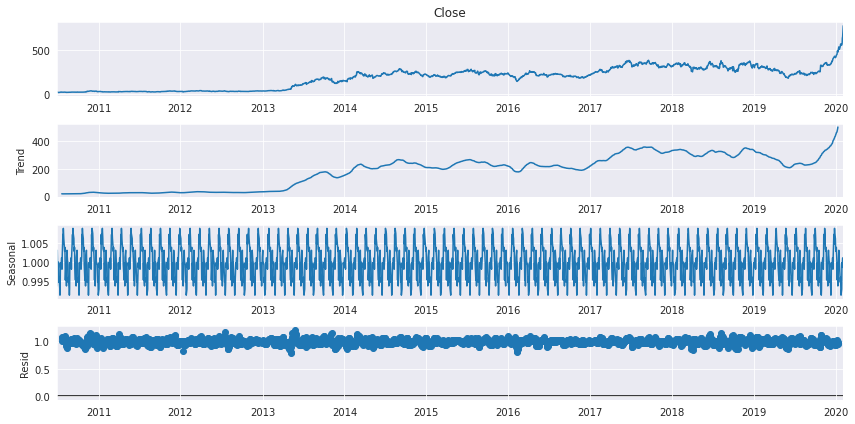

In [47]:
decom=seasonal_decompose(df['Close'],model='multiplicative',freq=30)
from pylab import rcParams
rcParams['figure.figsize']=12,6
decom.plot();

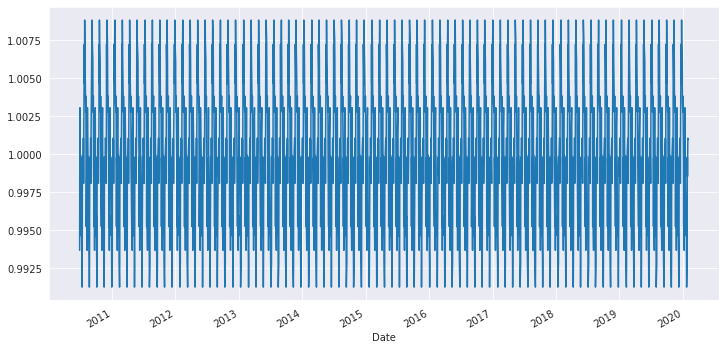

In [48]:
decom.seasonal.plot(figsize=(12,6))

In [69]:
auto_arima(train['Close'],trace=True,seasonal=True,m=7).summary()

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(1,0,1,7) [intercept=True]; AIC=11304.632, BIC=11348.986, Time=12.989 seconds
Fit ARIMA(0,1,0)x(0,0,0,7) [intercept=True]; AIC=11305.395, BIC=11316.484, Time=0.070 seconds
Fit ARIMA(1,1,0)x(1,0,0,7) [intercept=True]; AIC=11306.682, BIC=11328.860, Time=0.674 seconds
Fit ARIMA(0,1,1)x(0,0,1,7) [intercept=True]; AIC=11306.743, BIC=11328.921, Time=0.926 seconds
Fit ARIMA(0,1,0)x(0,0,0,7) [intercept=False]; AIC=11305.284, BIC=11310.828, Time=0.051 seconds
Fit ARIMA(2,1,2)x(0,0,1,7) [intercept=True]; AIC=11303.170, BIC=11341.981, Time=10.389 seconds
Fit ARIMA(2,1,2)x(0,0,0,7) [intercept=True]; AIC=11299.996, BIC=11333.262, Time=4.455 seconds
Fit ARIMA(2,1,2)x(1,0,0,7) [intercept=True]; AIC=11303.857, BIC=11342.668, Time=8.294 seconds
Fit ARIMA(1,1,2)x(0,0,0,7) [intercept=True]; AIC=11306.796, BIC=11334.517, Time=1.472 seconds
Fit ARIMA(2,1,1)x(0,0,0,7) [intercept=True]; AIC=11306.817, BIC=11334.539, Time=1.675 seconds
Fit ARIMA(3,1,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1891
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -5643.998
Date:                Sun, 14 Jun 2020   AIC                          11299.996
Time:                        14:03:10   BIC                          11333.262
Sample:                             0   HQIC                         11312.245
                               - 1891                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1407      0.110      1.282      0.200      -0.074       0.356
ar.L1          0.9925      0.014     72.976      0.000       0.966       1.019
ar.L2         -0.9813      0.014    -69.430      0.000      -1.009      -0.954
ma.L1         -0.9799      0.018    -53.953      0.000      -1.016      -0.944
ma.L2          0.9671      0.018     52.387      0.000       0.931       1.003
sigma2        22.9405      0.391     58.723      0.000      22.175      23.706
===================================================================================
Ljung-Box (Q):                       36.07   Jarque-Bera (JB):              2343.08
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):              39.57   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
model=SARIMAX(train['Close'],order=(2,1,2),seasonal_order=(0,0,0,7),enforce_invertibility=False)
result=model.fit()


In [71]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1891
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -5648.093
Date:                Sun, 14 Jun 2020   AIC                          11306.186
Time:                        14:04:19   BIC                          11333.908
Sample:                             0   HQIC                         11316.394
                               - 1891                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9268      0.083     11.163      0.000       0.764       1.090
ar.L2         -0.8843      0.085    -10.441      0.000      -1.050      -0.718
ma.L1         -0.9054      0.089    -10.170      0.000      -1.080      -0.731
ma.L2          0.8676      0.093      9.359      0.000       0.686       1.049
sigma2        23.2620      0.398     58.468      0.000      22.482      24.042
===================================================================================
Ljung-Box (Q):                       35.64   Jarque-Bera (JB):              2376.91
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):              40.51   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
prediction=result.predict(start=start,end=end,type='levels').rename("SARIMA_Pred")

In [73]:
prediction_df=pd.DataFrame(prediction)
prediction_df.index=test.index
prediction_df.head()

,SARIMA_Pred
Date,
2018-01-02,311.586179
2018-01-03,311.562625
2018-01-04,311.331953
2018-01-05,311.138998
2018-01-08,311.164149


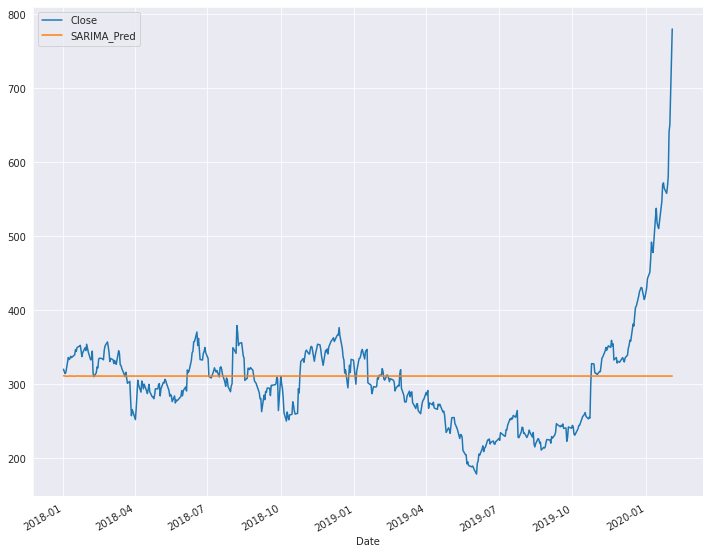

In [78]:
test['Close'].plot(figsize=(12,6),legend=True)
prediction_df['SARIMA_Pred'].plot(figsize=(12,10),legend=True)

In [75]:
np.sqrt(mean_squared_error(test['Close'],prediction_df['SARIMA_Pred']))

69.88987104278553

In [76]:
test['Close'].mean()

305.6309335485711

Well SARIMA Performed Well When Compared with ARIMA and it reduced Mean Square Error from 80 to 68!!

In [77]:
mape = np.mean(np.abs(prediction_df['SARIMA_Pred'] - test['Close'])/np.abs(test['Close']))
print('MAPE: '+str(mape))

MAPE: 0.16407711160069413


Our Model is 84% Accurate in predicting the Closing Price

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [0]:
train_dp=pd.DataFrame(train['Close'],columns=['Close'],index=train.index)
test_dp=pd.DataFrame(test['Close'],columns=['Close'],index=test.index)

In [0]:
scaler=MinMaxScaler()
scaled_train=scaler.fit_transform(train_dp)
scaled_test=scaler.transform(test_dp)

In [222]:
scaled_train

array([[0.02191224],
       [0.02174973],
       [0.01668472],
       ...,
       [0.80130015],
       [0.81137591],
       [0.80051464]])

In [224]:
scaled_test[:5]

array([[0.8253792 ],
       [0.81649512],
       [0.8093716 ],
       [0.81468035],
       [0.86839113]])

In [0]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [0]:
n_input=30
n_features=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1,)

In [0]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [260]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [261]:
# fit model
model.fit_generator(generator,epochs=5)

Epoch 1/5
1861/1861 [==============================] - 21s 11ms/step - loss: 0.0028
Epoch 2/5
1861/1861 [==============================] - 20s 11ms/step - loss: 6.4402e-04
Epoch 3/5
1861/1861 [==============================] - 20s 11ms/step - loss: 5.0224e-04
Epoch 4/5
1861/1861 [==============================] - 20s 11ms/step - loss: 4.2079e-04
Epoch 5/5
1861/1861 [==============================] - 20s 11ms/step - loss: 3.7220e-04


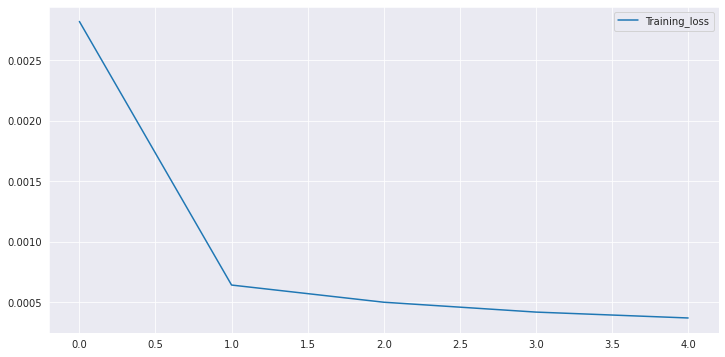

In [262]:
plt.figure(figsize=(12,6))
plt.plot(model.history.history['loss'],label='Training_loss')
plt.legend()

In [0]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [264]:
len(test_predictions)

525

In [0]:
true_predictions = scaler.inverse_transform(test_predictions)

In [0]:
test_dp['Predictions']=true_predictions

In [267]:
test_dp.head()

,Close,Predictions
Date,,
2018-01-02,320.529999,313.891702
2018-01-03,317.250000,315.064271
2018-01-04,314.619995,316.598774
2018-01-05,316.579987,318.295439
2018-01-08,336.410004,320.082483


In [268]:
test_dp.tail()

,Close,Predictions
Date,,
2020-01-28,566.900024,5.273449e+22
2020-01-29,580.989990,5.912668e+22
2020-01-30,640.809998,6.664748e+22
2020-01-31,650.570007,7.545020e+22
2020-02-03,780.000000,8.530468e+22


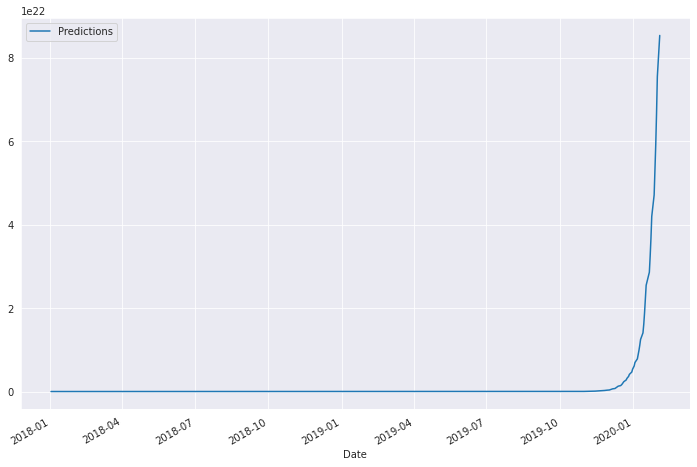

In [281]:
#train_dp['Close'].plot(figsize=(12,7),legend=True)
#test_dp['Close'].plot(figsize=(12,8),legend=True)
test_dp['Predictions'].plot(figsize=(12,8),legend=True)

In [280]:
test_dp.head()

,Close,Predictions
Date,,
2018-01-02,320.529999,313.891702
2018-01-03,317.250000,315.064271
2018-01-04,314.619995,316.598774
2018-01-05,316.579987,318.295439
2018-01-08,336.410004,320.082483


In [279]:
test_dp.tail(20)

,Close,Predictions
Date,,
2020-01-06,451.540009,7.824160e+21
2020-01-07,469.059998,8.817056e+21
2020-01-08,492.140015,9.872488e+21
2020-01-09,481.339996,1.107262e+22
2020-01-10,478.149994,1.246759e+22
2020-01-13,524.859985,1.404542e+22
2020-01-14,537.919983,1.610564e+22
2020-01-15,518.500000,1.889279e+22
2020-01-16,513.489990,2.229323e+22


In [272]:
np.sqrt(mean_squared_error(test_dp['Close'],test_dp['Predictions']))

7.994690658005792e+21